Duplicados encontrados: 0
customer_id        0
first_name         0
last_name          0
email              0
address            0
city               0
country            0
rental_id          0
rental_date        0
return_date        0
rental_duration    0
payment_id         0
amount             0
payment_date       0
dtype: int64


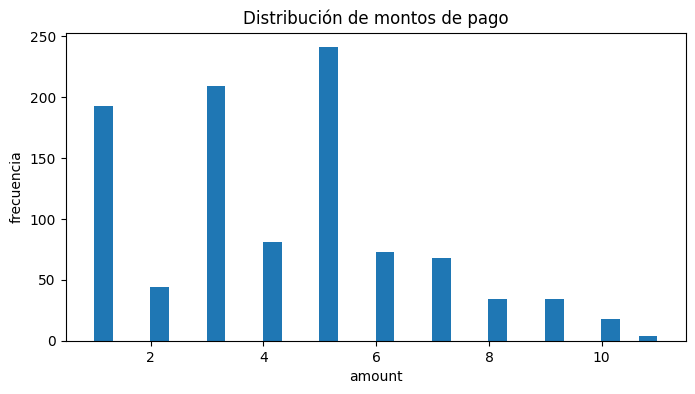

,customer_id,first_name,last_name,email,address,city,country,rental_id,rental_date,return_date,rental_duration,payment_id,amount,payment_date,payment_month,customer_full_name
0,130,charlotte,hunter,charlotte.hunter@sakilacustomer.org,758 junan lane,águas lindas de goiás,brazil,1,2005-05-24 22:53:30,2005-05-26 22:04:30,2,3504,2.99,2005-05-24 22:53:30,2005-05,charlotte hunter
1,459,tommy,collazo,tommy.collazo@sakilacustomer.org,76 kermanshah manor,qomsheh,iran,2,2005-05-24 22:54:33,2005-05-28 19:40:33,4,12377,2.99,2005-05-24 22:54:33,2005-05,tommy collazo
2,408,manuel,murrell,manuel.murrell@sakilacustomer.org,692 amroha drive,jaffna,sri lanka,3,2005-05-24 23:03:39,2005-06-01 22:12:39,8,11032,3.99,2005-05-24 23:03:39,2005-05,manuel murrell
3,333,andrew,purdy,andrew.purdy@sakilacustomer.org,431 szkesfehrvr avenue,baku,azerbaijan,4,2005-05-24 23:04:41,2005-06-03 01:43:41,10,8987,4.99,2005-05-24 23:04:41,2005-05,andrew purdy
4,222,delores,hansen,delores.hansen@sakilacustomer.org,810 palghat (palakkad) boulevard,jaroslavl,russian federation,5,2005-05-24 23:05:21,2005-06-02 04:33:21,9,6003,6.99,2005-05-24 23:05:21,2005-05,delores hansen


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1. Cargar datos
# ============================

df = pd.read_csv("/content/df_clientes_limpio.csv")

# ============================
# 2. Conversión de fechas
# ============================

df["rental_date"] = pd.to_datetime(df["rental_date"])
df["return_date"] = pd.to_datetime(df["return_date"])
df["payment_date"] = pd.to_datetime(df["payment_date"])

# ============================
# 3. Normalización de cadenas
# ============================

cols_texto = ["first_name", "last_name", "email", "address", "city", "country"]

for col in cols_texto:
    df[col] = df[col].astype(str).str.lower().str.strip()

# ============================
# 4. Tipos numéricos
# ============================

df["amount"] = df["amount"].astype(float)
df["rental_duration"] = df["rental_duration"].astype(int)

# ============================
# 5. Detección de duplicados
# ============================

duplicados = df.duplicated()
print("Duplicados encontrados:", duplicados.sum())

df = df.drop_duplicates()

# ============================
# 6. Valores faltantes
# ============================

print(df.isna().sum())

# Si existiera un nulo residual en rental_duration:
df["rental_duration"] = df["rental_duration"].fillna(df["rental_duration"].median())

# ============================
# 7. Detección de outliers
# (Z-score simple sobre amount)
# ============================

z = (df["amount"] - df["amount"].mean()) / df["amount"].std()
df = df[np.abs(z) < 3]   # quitar outliers

# ============================
# 8. Columnas derivadas
# ============================

df["payment_month"] = df["payment_date"].dt.to_period("M").astype(str)
df["customer_full_name"] = df["first_name"] + " " + df["last_name"]

# ============================
# 9. Visualización
# ============================

plt.figure(figsize=(8,4))
plt.hist(df["amount"], bins=30)
plt.title("Distribución de montos de pago")
plt.xlabel("amount")
plt.ylabel("frecuencia")
plt.show()

# ============================
# 10. Exportar dataset final
# ============================

df.to_csv("/content/df_cliente_final.csv", index=False)

df.head()